First we'll import the NetworkX package.

In [1]:
import networkx as nx

## Code example from Chapter 10

The graph in Figure 10.16 is represented as a series of nodes and edges and stored in the file ./Data/example_network_adjlist.txt Of the GitHub repository The data in the file is in a format that the NetworkX package can understand. So let’s start by reading in the graph using the read_adjlist function . We'll tell the function that the nodes have integer IDs using the nodetype=int option.

In [2]:
G = nx.read_adjlist("./Data/example_network_adjlist.txt", nodetype=int)

Now we have the graph stored in the object G, we can visualize it using the generic draw function of the NetworkX package. We'll explicitly pass in a spring_layout to the draw function, so that we can fix the random number seed used to create the graph layout. This ensures that when we run this snippet of code we get the same results each time, and when we color the nodes later on we can get the same layout to aid comparison.

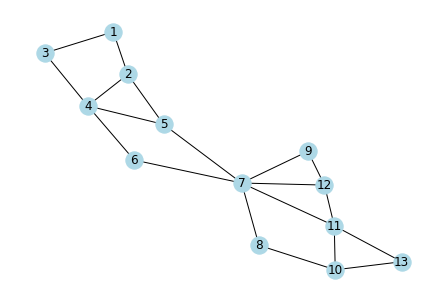

In [3]:
nx.draw(G, with_labels=True, node_color='lightblue', pos=nx.spring_layout(G, seed=293))

We’ll now apply a modularity maximization algorithm to the graph G. In this case we’ll use the greedy modularity maximization algorithm that the NetworkX package supplies. We call the function using community.greedy_modularity_communities .

In [4]:
communities = nx.community.greedy_modularity_communities(G)

We’ve stored the result in the communities object. Let’s take a look at it.

In [5]:
communities

[frozenset({7, 8, 9, 10, 11, 12, 13}), frozenset({1, 2, 3, 4, 5, 6})]

We can see that the communities object is two lists of integers, corresponding to the node IDs that the greedy modularity maximization algorithm has placed into two communities. In other words the algorithm has identified two communities, one consisting of nodes 1 to 6, and the other corresponding to nodes 7 to 13. We’ll add some colors to the node according to which community they are in. 

In [6]:
community_colors = ['lightblue', 'orange']
color_dict = {}
for i in range(len(communities)):
    x = list(communities[i])
    for j in range(len(x)):        
        color_dict[x[j]] = community_colors[i]

color_map = [color_dict[node] for node in G.nodes]

Note that we first created a dictionary that mapped the node label to a community color and then created a list that used that dictionary to map the node index to a community color. This is because the order in which the nodes are indexed does not necessarily match the node labels, even if those labels are integer values. So the node with a label of “6” is not necessarily stored as the 6th node. To check the order in which the nodes are indexed you can use G.nodes.

In [7]:
G.nodes

NodeView((1, 2, 3, 4, 5, 7, 6, 8, 9, 11, 12, 10, 13))

We can see that node 7 is indexed in 6th position and node 6 is indexed in 7th position. With that little nuance sorted out and a color map created, we can now redraw the graph with each node colored according to which community it is in.

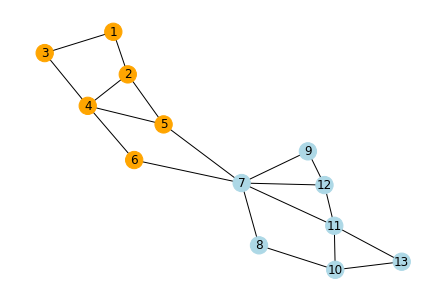

In [8]:
nx.draw(G, with_labels=True, node_color=color_map, pos=nx.spring_layout(G, seed=293))

## Using betweenness-centrality for community detection
As we menioned in the main text, there are many different metrics that one can use for community detection. In this example we'll use the same graph as before, but we use the betweenness-centrality edge measure to identify communities. Specifically, we'll use the Girvan-Newman algorithm. This algorithm identifies network edges with a high betweenness-centrality score and removed them. Edges with a high betweenness-centrality score are edges that act as bridges connecting different isolated parts of the graph, and so removing them begins to reveal the separate communities.

To run the Girvan-Newman algorithm we can just call the community.girvan_newman function of the NetworkX package and apply it to the graph G that we have already read in.

In [9]:
communities2 = nx.community.girvan_newman(G)

The girvan_newman function of the NetworkX package gives us an ???? that we can call to give us lists of the nodes in each community.

In [10]:
communities2_nodelists = tuple(sorted(c2) for c2 in next(communities2))

Let's look at those node lists

In [11]:
communities2_nodelists

([1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12, 13])

We can see that the Girvan-Newman algorithm has found two communities in our graph. Again this is not surprising given that we can see visually that our graph appears to have a two communities joined by node 7.

Now let's color those nodes using the same code snippet we used before and re-draw the graph with the nodes colored.

In [14]:
community_colors = ['lightblue', 'orange']
color_dict2 = {}
for i in range(len(communities2_nodelists)):
    x = list(communities2_nodelists[i])
    for j in range(len(x)):        
        color_dict2[x[j]] = community_colors[i]

color_map2 = [color_dict2[node] for node in G.nodes]

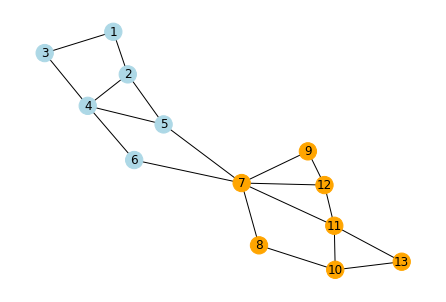

In [16]:
nx.draw(G, with_labels=True, node_color=color_map2, pos=nx.spring_layout(G, seed=293))